# Normalizer 

Z. W. Miller - Copyright 2018

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import sklearn
import matplotlib
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


In [28]:
import numpy as np
from copy import copy


class normalizer:
    
    def __init__(self, axis='col'):
        """
        Normalizer has two behaviors. If the axis is 'col', it divides
        each column by the maximum magnitude in that column. If the axis 
        is 'row', it forces each row to sum to 1.
        ---
        KWargs:
        axis: mode of behavior. See description for details.
        """
        self.axis = axis
        self.data_stats = {}
        self.number_of_columns = None
        if self.axis not in ['col', 'row']:
            raise ValueError("axis must be either 'row' or 'col'")
        
    def fit(self, X):
        """
        If axis='col', learns about the input data and 
        stores the max value of each column. If set for 
        'row', does nothing.
        ---
        In: X (features); np.array or pandas dataframe/series
        """
        X = self.convert_to_array(X)
        self.number_of_columns = X.shape[1]
        
        if self.axis == 'col':
            for ix in range(self.number_of_columns):
                self.data_stats[ix] = np.amax(np.abs(X.T[ix]))
    
    def transform(self,X):
        """
        Given the information learned about the training data,
        remove the mean and scale the new data as requested by
        the user.
        ---
        In: X (features); np.array or pandas dataframe/series
        """
        X = self.convert_to_array(X)
        new_X = copy(X)
        
        if self.axis == 'col':
            for ix in range(self.number_of_columns):
                new_X.T[ix] = new_X.T[ix]/self.data_stats[ix]
            
        if self.axis == 'row':
            new_X = new_X/np.sum(new_X**2, axis=1).reshape(-1,1)
            
        return new_X
    
    def fit_transform(self, X):
        """
        Learn from X and then return the transformed version
        of X for the user to use.
        ---
        In: X (features); np.array or pandas dataframe/series
        """
        self.fit(X)
        return self.transform(X)
    
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        """
        Converts 1 dimensional data into a series of rows with 1 columns
        instead of 1 row with many columns.
        """
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        """
        Takes in an input and converts it to a numpy array
        and then checks if it needs to be reshaped for us
        to use it properly
        """
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x

In [29]:
from sklearn.datasets import load_iris

data = load_iris().data

In [31]:
norm = normalizer(axis='col')
norm.fit(data)
norm.transform(data)[:10]

array([[ 0.64556962,  0.79545455,  0.20289855,  0.08      ],
       [ 0.62025316,  0.68181818,  0.20289855,  0.08      ],
       [ 0.59493671,  0.72727273,  0.1884058 ,  0.08      ],
       [ 0.58227848,  0.70454545,  0.2173913 ,  0.08      ],
       [ 0.63291139,  0.81818182,  0.20289855,  0.08      ],
       [ 0.6835443 ,  0.88636364,  0.24637681,  0.16      ],
       [ 0.58227848,  0.77272727,  0.20289855,  0.12      ],
       [ 0.63291139,  0.77272727,  0.2173913 ,  0.08      ],
       [ 0.55696203,  0.65909091,  0.20289855,  0.08      ],
       [ 0.62025316,  0.70454545,  0.2173913 ,  0.04      ]])

In [32]:
norm = normalizer(axis='row')
norm.fit(data[:,:2])
normed_data = norm.transform(data)

[[ 0.1266766   0.08693492  0.03477397  0.00496771]
 [ 0.13996001  0.0856898   0.03998857  0.00571265]
 [ 0.13799178  0.09395185  0.03816794  0.00587199]
 [ 0.13914096  0.09376891  0.04537205  0.00604961]
 [ 0.12512513  0.09009009  0.03503504  0.00500501]
 [ 0.113876    0.08224378  0.03584985  0.00843526]
 [ 0.13229796  0.09778545  0.0402646   0.00862813]
 [ 0.12870013  0.08751609  0.03861004  0.00514801]
 [ 0.1477998   0.0974135   0.04702721  0.00671817]
 [ 0.13656633  0.08639911  0.04180602  0.00278707]]


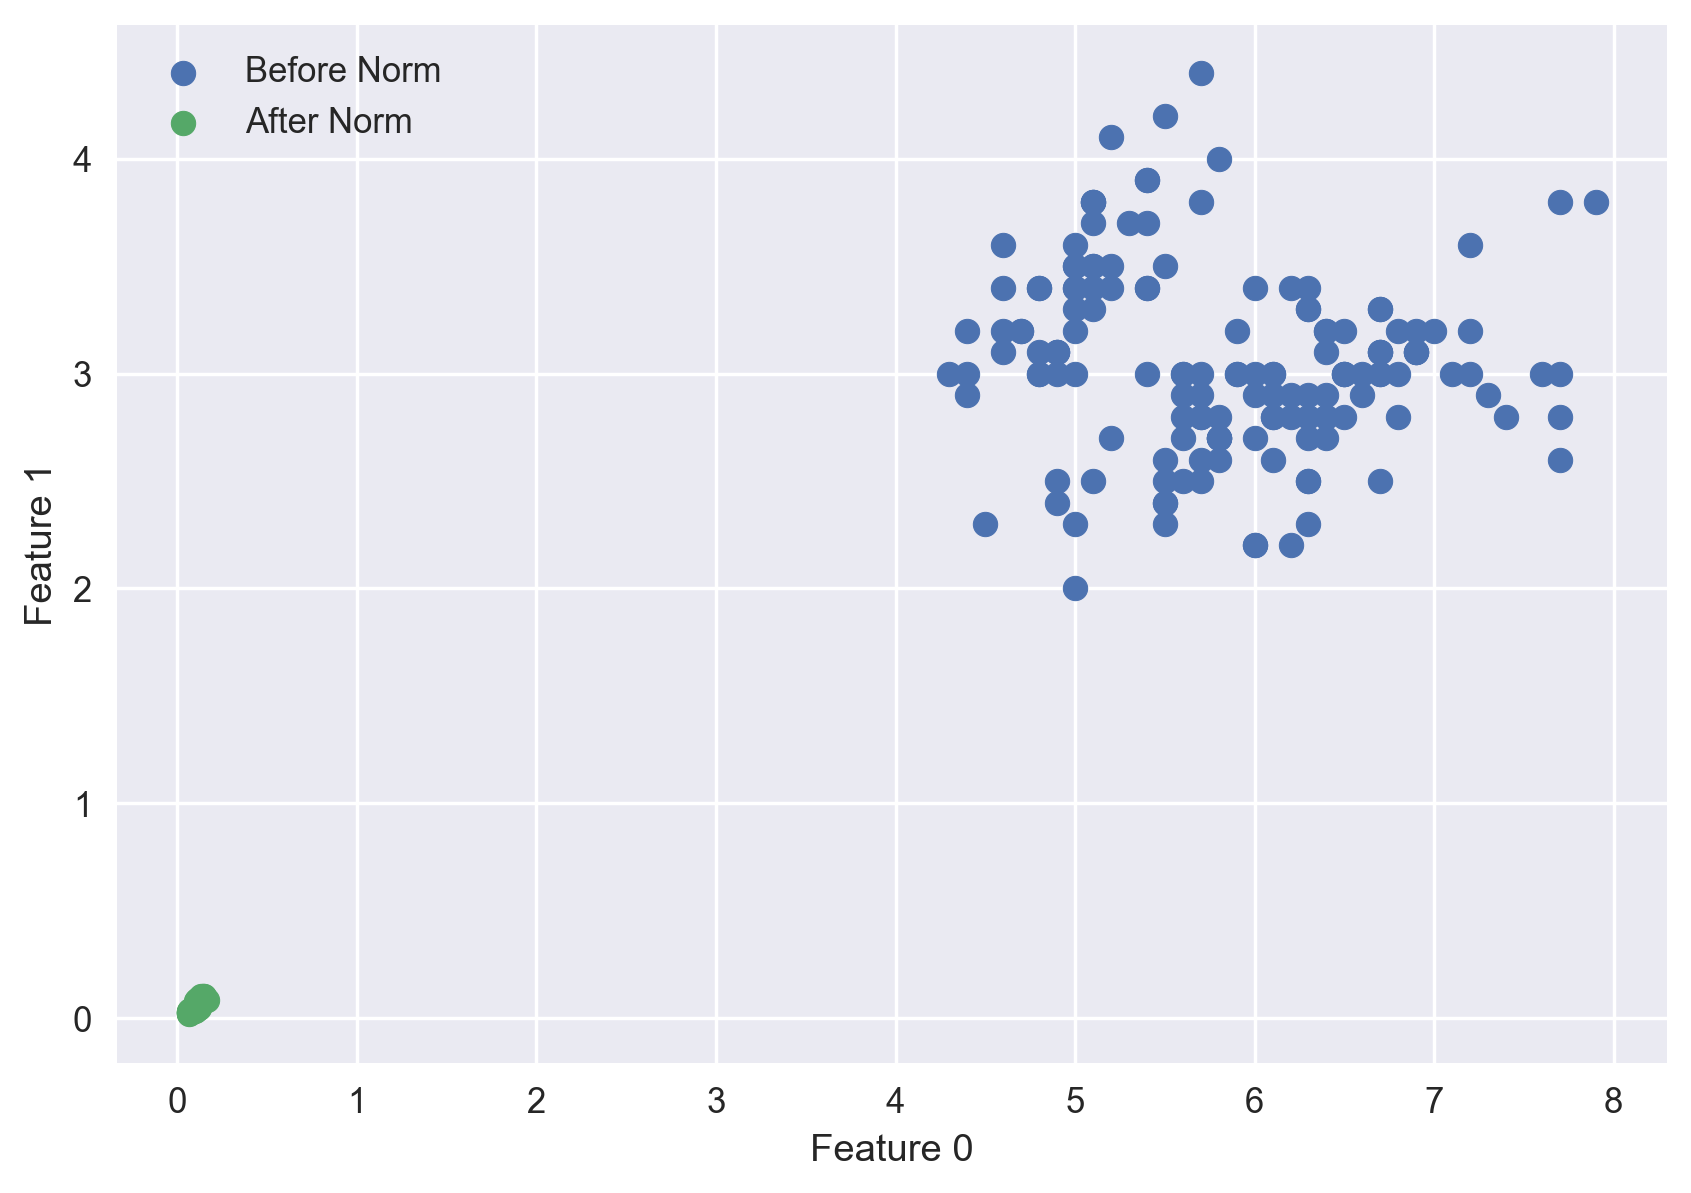

In [39]:
print(normed_data[:10])
plt.figure(dpi=250)
plt.scatter(data[:,0], data[:,1], label="Before Norm");
plt.scatter(normed_data[:,0], normed_data[:,1], label="After Norm");
plt.xlabel("Feature 0");
plt.ylabel("Feature 1");
plt.legend(loc='upper left');

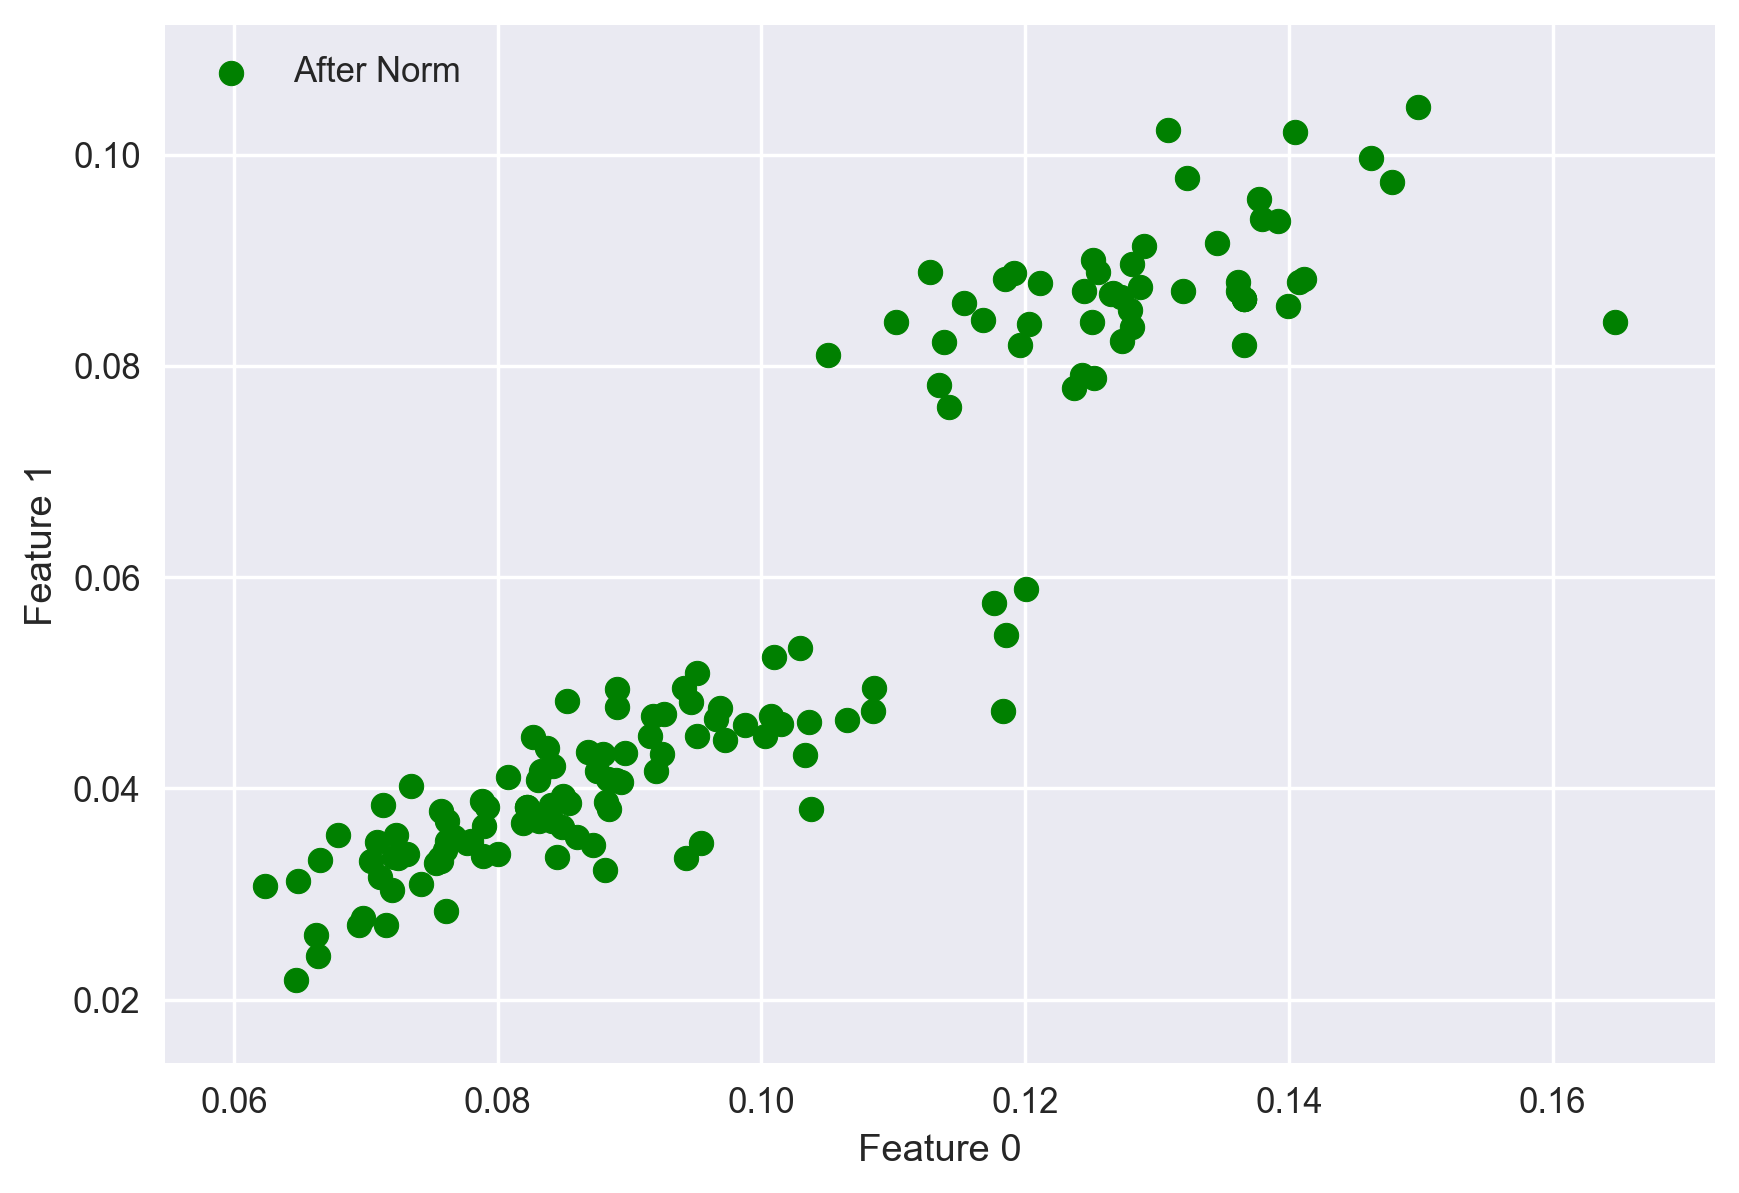

In [38]:
plt.figure(dpi=250)
plt.scatter(normed_data[:,0], normed_data[:,1], c='g', label="After Norm");
plt.xlabel("Feature 0");
plt.ylabel("Feature 1");
plt.legend(loc="upper left");